Эмпирическая функция распределения (ECDF)

ECDF (Empirical Cumulative Distribution Function) - это функция, которая показывает долю данных, меньших или равных определенному значению. В отличие от гистограммы, которая разбивает данные на интервалы (бины) и отображает количество наблюдений в каждом интервале, ECDF строит кумулятивное распределение данных. Это значит, что ECDF предоставляет накопленную частоту данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.ecdfplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='proportion', complementary=False, palette=None, hue_order=None, hue_norm=None, log_scale=None, legend=True, ax=None, **kwargs)

Как строится ECDF?

1) Сначала сортируются все значения в наборе данных.
2) Для каждого значения в отсортированном наборе данных рассчитывается доля данных, которая меньше или равна этому значению.
3) На оси X откладываются значения данных, а на оси Y - кумулятивная частота для каждого значения.

sns.ecdfplot()

1) data: массив данных или датафрейм, содержащий данные для построения ECDF;
2) x: имя столбца или массив значений для оси X;
3) y: (нечасто используется) имя столбца или массив значений для оси Y. В ECDF чаще используется параметр x;
4) hue: имя столбца или массив, задающий подгруппы данных для отображения на графике разными цветами;
5) weights: массив весов для взвешенного ECDF;
6) stat: тип статистики для отображения на оси Y ('proportion' (по умолчанию), 'count', 'percent' -- не работает)';
7) complementary: логическое значение, указывающее, строить ли дополнительную ECDF (1 - ECDF). По умолчанию False;
8) palette: палитра цветов для подгрупп, заданных параметром hue;
9) hue_order: определяет порядок категорий в подгруппах;
10) log_scale: логическое значение или пара значений, указывающих, применять ли логарифмическое масштабирование к осям. Например, log_scale=True для логарифмической шкалы на обеих осях или log_scale=(False, True) для логарифмической шкалы только на оси Y

In [4]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


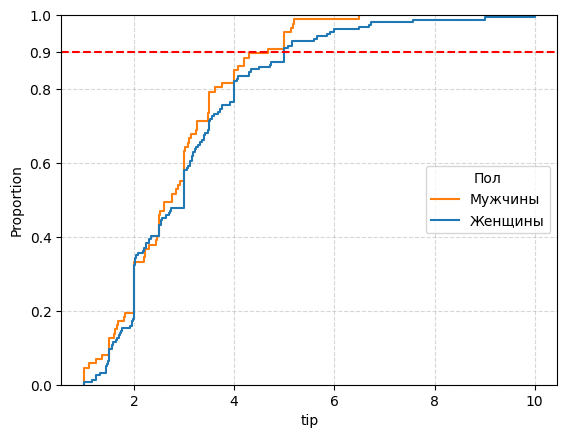

In [23]:
sns.ecdfplot(x='tip', data=tips,
             hue='sex');

plt.grid(linestyle='--', alpha=0.5);

plt.axhline(0.9, c='r', ls='--')

ticks = plt.yticks()[0] 
new_ticks = list(ticks) + [0.9]
plt.yticks(new_ticks)

plt.legend(['Мужчины', 'Женщины'],
          title='Пол',
          loc='center right');

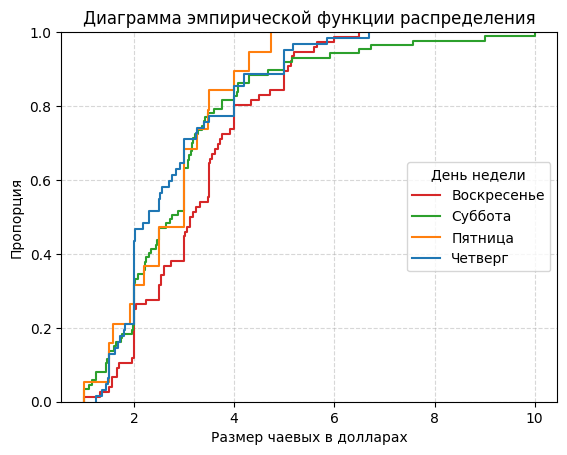

In [8]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             lw = 1.5)

plt.legend(['Воскресенье', 'Суббота', 'Пятница', 'Четверг'], 
           title='День недели',
           loc='center right')
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Размер чаевых в долларах')
plt.ylabel('Пропорция')
plt.title('Диаграмма эмпирической функции распределения');

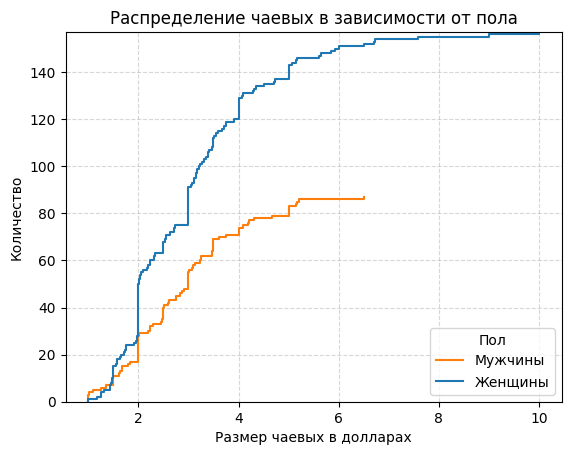

In [10]:
sns.ecdfplot(x='tip', data=tips,
             hue='sex',
             stat='count')

plt.grid(linestyle='--', alpha=0.5)

plt.legend(['Мужчины', 'Женщины'],
          title='Пол',
          loc='lower right');

plt.xlabel('Размер чаевых в долларах')
plt.ylabel('Количество')
plt.title('Распределение чаевых в зависимости от пола');

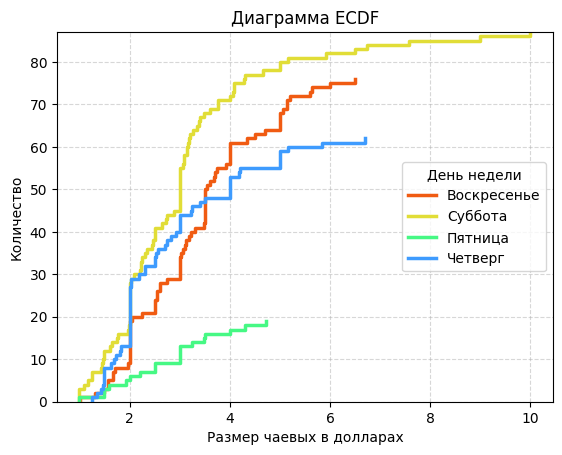

In [12]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             stat='count',
             palette='turbo',
             lw = 2.5)

plt.legend(['Воскресенье', 'Суббота', 'Пятница', 'Четверг'], 
           title='День недели',
           loc='center right')
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Размер чаевых в долларах')
plt.ylabel('Количество')
plt.title('Диаграмма ECDF');

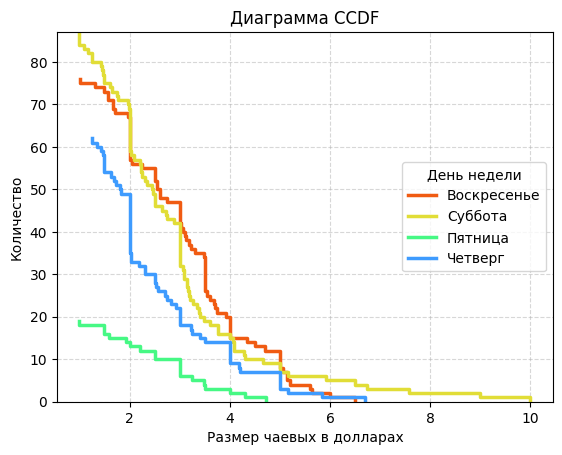

In [14]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             stat='count',
             palette='turbo',
             lw = 2.5,
             complementary=True)

plt.legend(['Воскресенье', 'Суббота', 'Пятница', 'Четверг'], 
           title='День недели',
           loc='center right')
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Размер чаевых в долларах')
plt.ylabel('Количество')
plt.title('Диаграмма CCDF');

In [16]:
tips['weights'] = 1 / tips['size']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,weights
0,16.99,1.01,Female,No,Sun,Dinner,2,0.500000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.333333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.333333
3,23.68,3.31,Male,No,Sun,Dinner,2,0.500000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.250000


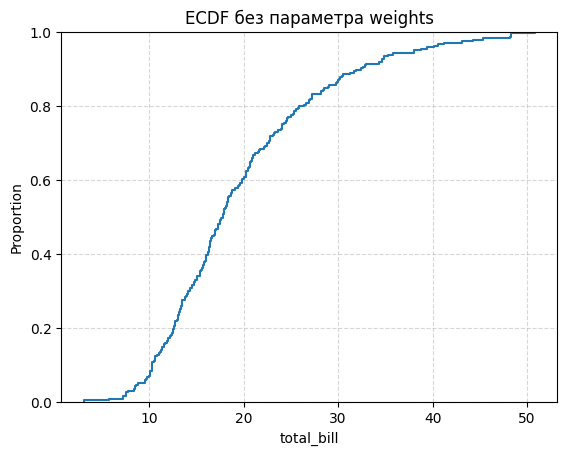

In [18]:
sns.ecdfplot(x='total_bill', data=tips)

plt.title('ECDF без параметра weights')
plt.grid(linestyle='--', alpha=0.5);

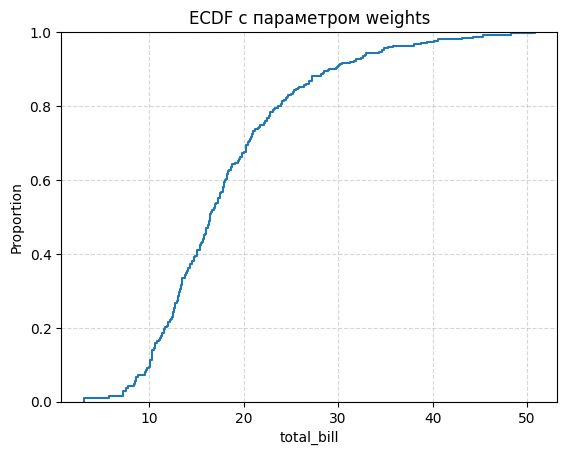

In [20]:
sns.ecdfplot(x='total_bill', data=tips,
             weights='weights')

plt.title('ECDF с параметром weights')
plt.grid(linestyle='--', alpha=0.5);